In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_friedman1
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import json
from sklearn.dummy import DummyRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from utils import FriedmanDataset, run_kfold_visualizer, ModelOptimizerFinal 

In [3]:
# current date as string (for saving json)
from datetime import date
today = date.today().strftime("%d-%m-%Y")
today

json_file = "./results-RF-anne.json" # set path to save json-file 




In [26]:
# Data Creation
n_train= 200
n_test= 100000
n_features = 10
FD_noise= 0
transformation='sqrt'
seed=567

# Stratification
n_groups = 20

# RandomSearchCV
n_folds = 5
n_iter= 200
n_repetitions= 10
scoring= 'neg_mean_squared_error' #Metriken anschauen
n_jobs= -1

RF_param_grid = {
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': np.arange(1, n_features + 1) #@nadja is that right?
}

# Initalize Model
modelOptimizer = ModelOptimizerFinal(RandomForestRegressor(random_state=seed), 
                                RF_param_grid,
                                random_state=seed)

model = RandomForestRegressor(n_estimators=1000, random_state=seed) 
# Save Parameters in a dictionary
params = {'model': modelOptimizer.model.__class__.__name__,
          'n_train': n_train,
          'n_test': n_test,
          'n_features': n_features,
          'FD_noise': FD_noise,
          'transformation': transformation,
          'n_groups': n_groups,
          'n_folds': n_folds,
          'n_iter': n_iter,
          'n_repetitions': n_repetitions,
          'scoring': scoring, 
          'n_jobs': n_jobs,
          'json_file': json_file}
params

{'model': 'RandomForestRegressor',
 'n_train': 200,
 'n_test': 100000,
 'n_features': 10,
 'FD_noise': 0,
 'transformation': 'sqrt',
 'n_groups': 20,
 'n_folds': 5,
 'n_iter': 200,
 'n_repetitions': 10,
 'scoring': 'neg_mean_squared_error',
 'n_jobs': -1,
 'json_file': './results-RF-anne.json'}

In [20]:
train = FriedmanDataset(n_samples=n_train, 
                            n_features=n_features, 
                            noise=FD_noise, 
                            random_state=seed)
#train.transform(transformation=transformation)

test = FriedmanDataset(n_samples=n_test,
                           n_features=n_features,
                           noise=FD_noise,
                           random_state=seed)

In [ ]:
unstratified_results, stratified_results = modelOptimizer.optimize(params#,
                                                                   #random_states=random_states
                                                                   )

In [27]:
# get parameters from params dictionary
n_train = params['n_train']
n_test = params['n_test']
n_features = params['n_features']
noise = params['FD_noise']
transformation = params['transformation']
n_folds= params['n_folds']
n_groups = params['n_groups']
scoring = params['scoring']
n_jobs = params['n_jobs']
n_iter = params['n_iter']
n_repetitions = params['n_repetitions']
json_file = params['json_file']

In [129]:
X_test, y_test = generate_friedman1(n_samples=n_test,
                                                     n_features=n_features,
                                                     noise=5,
                                                     random_state=1718,
                                                     transformation='sqrt')

In [130]:
y_test

array([3.10640523, 4.63792817, 4.48607413, ..., 1.78628304, 3.45557194,
       4.6009606 ])

In [39]:
import random

In [38]:
random_states = None

In [40]:
if not isinstance(random_states, list):
    random.seed(seed)
    random_states = random.sample(range(1, 10000), n_repetitions)

In [41]:
random_states

[2331, 5223, 7789, 1361, 9493, 4638, 7623, 6460, 479, 2661]

In [42]:
all_results = {}
all_results_stratified = {}

In [44]:
initialization = {
            'model_info': params,
            'seed': seed
        }
initialization

{'model_info': {'model': 'RandomForestRegressor',
  'n_train': 200,
  'n_test': 100000,
  'n_features': 10,
  'FD_noise': 0,
  'transformation': 'sqrt',
  'n_groups': 20,
  'n_folds': 5,
  'n_iter': 200,
  'n_repetitions': 10,
  'scoring': 'neg_mean_squared_error',
  'n_jobs': -1,
  'json_file': './results-RF-anne.json'},
 'seed': 567}

In [48]:
for repetition in range(n_repetitions):
    print(repetition)

repetition=0

0
1
2
3
4
5
6
7
8
9


In [131]:
X_train, y_train = generate_friedman1(n_samples=n_train,
                                                        n_features=n_features,
                                                        noise=5,
                                                        random_state=random_states[repetition],
                                                        transformation='sqrt')

In [132]:
y_train

array([4.24480491, 3.75802221, 5.05028961, 4.33340671, 3.88975302,
       4.97864666, 4.51332033, 4.53210509, 3.37281676, 1.40220202,
       4.78256716, 3.94048031, 4.8109586 , 3.75746215, 3.48710167,
       2.88312239, 3.64504473, 4.1192131 , 4.05030068, 3.99963594,
       4.52933586,        nan, 3.41296582, 1.53978225, 3.64376994,
       3.26448527, 3.78215468, 3.91556482, 4.48865919,        nan,
       4.30224533, 5.25379081, 2.46112927, 4.62044858, 4.67913174,
       3.11906829, 3.15229023, 3.66581649, 4.04009027, 4.489475  ,
       4.61656701, 3.42522022, 3.82776742, 0.85874264, 3.72010053,
       3.82286338, 2.35519664, 3.82535325, 3.49936724, 2.02979521,
       4.52880907, 6.27966252, 2.63874066, 2.95221701, 4.48371754,
       4.14363162, 3.60366544, 2.75491293, 4.68869887, 3.59156614,
       4.36178895, 3.54202909, 3.64165355, 5.45734961,        nan,
       2.82520916, 4.53953874, 4.41600386, 4.03357916, 2.80228078,
       4.38403903, 4.21879338, 4.39115016, 3.58982041, 4.86677

In [133]:
np.isnan(y_train).any()

True

In [135]:
# Check for NaN values in the data
            
X_train, y_train = make_friedman1(n_samples=n_train,
                                    n_features=n_features, 
                                    noise=noise, 
                                    random_state=random_states[repetition])
X_test, y_test = make_friedman1(n_samples=n_test,
                                    n_features=n_features,
                                    noise=noise,
                                    random_state=1718)
min_val = min(y_train.min(), y_test.min())
                # @Anne: Noch absprechen... +1 weil es sonst Skala durch Werte [0, 1] hauptsächlich bei y_test größer wird.           
y_train = y_train + abs(min_val) + 1
y_test = y_test + abs(min_val) + 1
if transformation=='identity':
    pass
elif transformation == 'log':
    y_train = np.log(y_train)
    y_test = np.log(y_test)
elif transformation == 'sqrt':
    y_train = np.sqrt(y_train)
    y_test = np.sqrt(y_test)

In [136]:
y_train.min()

2.091313474404352

In [137]:
y_test.min()

1.380320768233755

In [94]:
min(y_train.min(), y_test.min())

-12.55568832388697

In [95]:
abs(min(y_train.min(), y_test.min())-0.1)

12.65568832388697

In [92]:
min(y_test + abs(min(y_train.min(), y_test.min())-0.1))

0.09999999999999964

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

1.8605467590571614


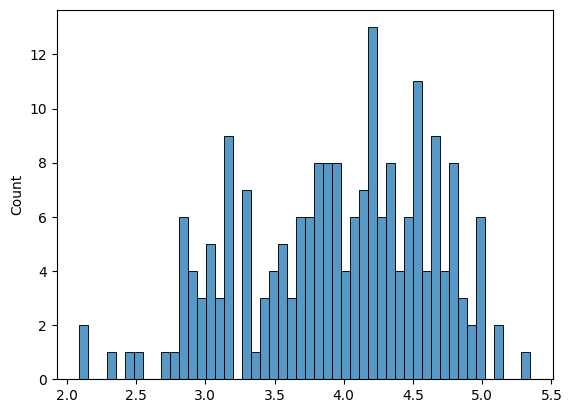

In [138]:
sns.histplot(y_train, bins=50)
print(min(np.sqrt(y_train+ abs(min(y_train.min(), y_test.min())-0.01))))

1.6585058144207727


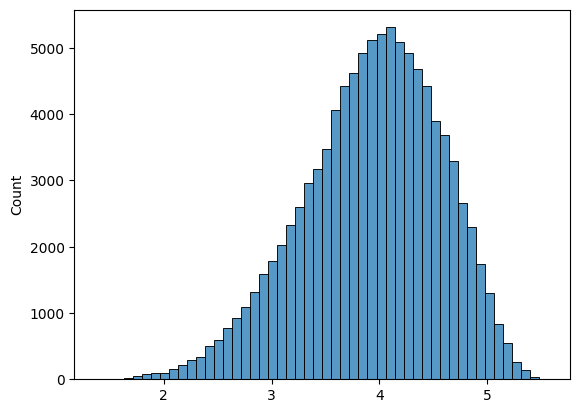

In [139]:
sns.histplot(y_test, bins=50)
print(min(np.sqrt(y_test+ abs(min(y_train.min(), y_test.min())-0.01))))

In [124]:
y_train

array([18.01836873, 14.12273089, 25.50542513, 18.77841373, 15.13017859,
       24.78692252, 20.37006039, 20.53997651, 11.37589291,  1.96617052,
       22.87294863, 15.52738508, 23.14532267, 14.11852183, 12.15987803,
        8.31239474, 13.2863511 , 16.96791658, 16.40493557, 15.99708764,
       20.51488334, -1.11065076, 11.6483357 ,  2.37092937, 13.27705938,
       10.65686408, 14.30469402, 15.33164787, 20.14806135, -6.37651535,
       18.50931487, 27.6023179 ,  6.05715729, 21.34854508, 21.89427388,
        9.72858702,  9.9369337 , 13.43821056, 16.3223294 , 20.15538577,
       21.31269092, 11.73213358, 14.65180339,  0.73743891, 13.83914792,
       14.61428445,  5.5469512 , 14.63332747, 12.24557107,  4.12006861,
       20.51011161, 39.43416137,  6.96295228,  8.71558525, 20.10372297,
       17.16968298, 12.98640459,  7.58954524, 21.98389711, 12.89934735,
       19.02520284, 12.54597005, 13.26164059, 29.78266476, -1.31898184,
        7.98180679, 20.60741194, 19.50109011, 16.26976085,  7.85

In [30]:
def generate_friedman1(n_samples, n_features, noise, random_state, transformation='identity'):
        '''
        Function to generate dataset according to Friedman1.
        Inputs:
            n_samples: number of data points
            n_features: number of features (have to be at least 5)
            noise: The standard deviation of the gaussian noise applied to the output.
            random_state: to repreoduce dataset
        Outputs:
            features: array
            y: array

        '''
        features, y = make_friedman1(n_samples=n_samples, 
                                    n_features=n_features, 
                                    noise=noise, 
                                    random_state=random_state)
        if transformation=='identity':
            pass
        elif transformation == 'log':
            y = np.log(y)
             
        elif transformation == 'sqrt':
            y = np.sqrt(y)
             
        else:
            raise ValueError('Transformation not implemented.')

        return features, y

In [45]:
def _perform_optimization(model,
                          param_grid,
                              X_train, 
                              y_train, 
                              X_test, 
                              y_test, 
                              cv, 
                              n_groups, 
                              scoring, 
                              n_jobs, 
                              n_iter, 
                              random_state,
                              stratified):
        '''
        Function to perform the optimization.
        Inputs:
            the same as in optimize function
            stratified: whether to use stratified k-fold or not
        Outputs:
            evaluation_results: the evaluation results in a dictionary
            best_params: the best parameters in a dictionary
        '''
        if stratified:
            cv_splits = self.create_cont_folds(y_train, n_folds=cv, n_groups=n_groups)
            output_text = 'Stratified Split Cross-validation'
        else:
            cv_splits = cv
            output_text = 'Random Split Cross-validation'
        
        start_time = time.time()
        random_search = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           n_iter=n_iter,
                                           cv=cv_splits,
                                           scoring=scoring,
                                           n_jobs=n_jobs,
                                           random_state=random_state)
        random_search.fit(X_train, y_train)
        end_time = time.time()
        running_time = end_time - start_time
        print("Best Parameters:", random_search.best_params_)

        # Evaluate the model
        evaluation_results = self.evaluate_rf(random_search, X_train, X_test, y_train, y_test)
        print("Evaluation Results of", output_text, ': ', evaluation_results)
        print('running_time: ', round(running_time/60, 2), ' min')
        
        return evaluation_results, random_search.best_params_, running_time

def create_cont_folds(y, 
                          n_folds=5, 
                          n_groups=5, 
                          seed=1):
        '''
        Function to create continuous folds.
        Inputs:
            y: the target variable
            n_folds: the number of folds
            n_groups: the number of groups (based on quantiles)
            seed: the seed to be used
        Outputs:
            cv_splits: the indices for the folds
        '''
        # create StratifiedKFold like for classification
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

        # create groups in y with pd.qcut: quantile-based discretization 
        y_grouped = pd.qcut(y, n_groups, labels=False)

        # create fold numbers    
        fold_nums = np.zeros(len(y))
        #split(X, y[, groups]): Generate indices to split data into training and test set
        for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
            fold_nums[v] = fold_no

        cv_splits = []

        # iterate over folds and creat train and test indices for each fold
        for i in range(n_folds):
            test_indices = np.argwhere(fold_nums==i).flatten()
            train_indices = list(set(range(len(y_grouped))) - set(test_indices))
            cv_splits.append((train_indices, test_indices))

        return cv_splits

def evaluate_rf(model, X_train, X_test, y_train, y_test):
        '''
        Function to evaluate the model.
        Inputs:
            model: the model to be evaluated
            X_train, X_test, y_train, y_test: the train and test data
        Outputs:
            dictionary with the evaluation results (R2, MSE, MAE)
        '''
        model=model.best_estimator_
        # @Anne: This somehow also does not work, do not know why.
        #best_score = model.best_score_

        train_r2, test_r2 = round(model.score(X_train, y_train), 4), round(model.score(X_test, y_test), 4)
        y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)
        train_mse, test_mse = round(mean_squared_error(y_train, y_train_pred), 4), round(mean_squared_error(y_test, y_test_pred), 4)
        train_mae, test_mae = round(mean_absolute_error(y_train, y_train_pred), 4), round(mean_absolute_error(y_test, y_test_pred), 4)
        return {'train r2': train_r2, 
                'test r2': test_r2, 
                'train mse': train_mse,
                'test mse': test_mse,
                'train mae': train_mae,
                'test mae': test_mae}
        
     
def _convert_numpy_types(obj):
        '''
        Function to convert numpy types.
        Inputs:
            obj: the object to be converted
        Outputs:
            the converted object
        '''
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, np.int32):
            return int(obj)
        elif isinstance(obj, np.int64):
            return int(obj)
        elif isinstance(obj, (list, tuple)):
            return [_convert_numpy_types(item) for item in obj]
        elif isinstance(obj, dict):
            return {key: _convert_numpy_types(value) for key, value in obj.items()}
        else:
            return obj